# Task2
- Regression: predict home price (target: price_sold)

# Agenda

1. [Task2](#task2)
2. [Agenda](#agenda)
3. [Idea](#idea)
4. [EDA & Data Preprocessing](#eda--data-preprocessing)
   - [Cat features and Num features](#cat-features-and-num-features)
   - [Data Cleansing](#data-cleansing)
   - [Num features](#num-features)
      - [Data Distribution](#data-distribution)
      - [Data imbalance](#data-imbalance)
      - [Outliers](#outliers)
      - [Correlation Matrix](#correlation-matrix)
      - [Data Leakage](#data-leakage)
   - [Cat features](#cat-features)
      - [Data Distribution](#data-distribution-1)
   - [Missing data handling](#missing-data-handling)
      - [Data Imputation](#data-imputation)
   - [Feature Engineering](#feature-engineering)
   - [Train Valid Split](#train-valid-split)
   - [Encode for cat features](#encode-for-cat-features)
   - [Standardize the num features](#standardize-the-num-features)
5. [Training](#training)
   - [1. Decision Tree (DT)](#1-decision-tree-dt)
   - [2. Random Forest (RF)](#2-random-forest-rf)
   - [3. XGBoost](#3-xgboost)
   - [4. LightGBM](#4-lightgbm)
6. [Evaluation](#evaluation)
   - [Metric (RMSE)](#metric-rmse)
   - [Model Comparison](#model-comparison)
   - [Feature Importance](#feature-importance)
      - [Gain](#gain)
      - [Split](#split)
   - [Result Analysis](#result-analysis)
7. [Improvement](#improvement)
8. [Live Production Monitoring](#live-production-monitoring)
   - [Real-time Dashboard](#real-time-dashboard)
   - [Retrain model](#retrain-model)

# Idea
- What models fit for this dataset? Why?
- Compare their results
    1. Decision Tree (DT)
        - As a baseline model
        - often better than linear regression
            - can only capture linear relationships between the features and the target variable
            - DTs can capture non-linear relationships between the features and the target variable
    2. Random Forest (RF)
        - Ensemble of decision trees often better than a single decision tree
        - less prone to overfitting
            - average the predictions of multiple trees which reduces the variance and helps prevent overfitting
    3. Gradient Boosted Trees (GBTs)
        - XGBoost, LightGBM
        - GBTs often better than RF due to their complexity and ability to capture complex data patterns. 
            - RF: build multiple trees independently and then average their results
            - GBT: built tree sequentially. Each new tree is trained to correct the errors made by the previous ensemble of trees. 
            - GBTs use a gradient descent approach to minimize the loss function.
            - Additive Model: The final prediction is the sum of the predictions from all the trees in the ensemble where each tree is weighted making the model more complex.


# EDA & Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 1999

In [2]:
df = pd.read_csv("https://drive.usercontent.google.com/u/0/uc?id=1L4jMiip74j7DwXyvoR8p-AkiliP2nHKA&export=download")
display(df.dtypes)
print(f"df.shape: {df.shape}")
df.head().T

property_type                    object
br                              float64
br_plus                         float64
br_final                        float64
bath_tot                        float64
taxes                           float64
lp_dol                            int64
yr_built                         object
gar_type                         object
garage                          float64
topHighschoolScoreLevel         float64
topBelowHighschoolScoreLevel    float64
geo_latitude                    float64
geo_longitude                   float64
lot_frontfeet                   float64
lot_depthfeet                   float64
sqft_numeric                    float64
id_community                    float64
id_municipality                 float64
date_start                       object
date_end                         object
price_sold                      float64
dtype: object

df.shape: (100000, 22)


,0,1,2,3,4
property_type,D.,A.,D.,D.,D.
br,4.0,4.0,3.0,3.0,4.0
br_plus,2.0,NaN,NaN,1.0,NaN
br_final,4.2,4.0,3.0,3.1,4.0
bath_tot,4.0,3.0,1.0,3.0,2.0
taxes,4804.09,0.0,2100.0,4025.75,NaN
lp_dol,1049900,406400,429900,599000,3250
yr_built,NaN,New,NaN,NaN,NaN
gar_type,Attached,Attached,Detached,Built-In,Attached
garage,2.0,1.0,2.0,1.0,1.0


In [3]:
print(f"Data period: from {df.date_end.min()} to {df.date_end.max()}")

Data period: from 2015-10-16 00:00:00 to 2019-11-13 00:00:00


## Cat features and Num features

In [4]:
target = ['price_sold']
cat_features = ['property_type', 'gar_type', 'id_community', 'id_municipality', 'yr_built']
num_features = ['br_final', 'bath_tot', 'taxes', 'lp_dol', 'garage', 'geo_latitude', 'geo_longitude', 'lot_frontfeet', 'lot_depthfeet', 'sqft_numeric']

print(f"target: {target}")
print(f"cat_features: {cat_features}")
print(f"num_features: {num_features}\n")

target: ['price_sold']
cat_features: ['property_type', 'gar_type', 'id_community', 'id_municipality', 'yr_built']
num_features: ['br_final', 'bath_tot', 'taxes', 'lp_dol', 'garage', 'geo_latitude', 'geo_longitude', 'lot_frontfeet', 'lot_depthfeet', 'sqft_numeric']



## Data Cleansing
price_sold: 
- As we predict the price_sold which is no way to be 0
- remove null in price_sold

In [5]:
display(df[df.price_sold.isnull()].head())
print(f"rows of null in price_sold: {sum(df.price_sold.isnull())}")

# remove null in price_sold
df = df[df.price_sold.notnull()]
print(f"removed null in price_sold, remaining rows: {df.shape}")

,property_type,br,br_plus,br_final,bath_tot,taxes,lp_dol,yr_built,gar_type,garage,...,geo_latitude,geo_longitude,lot_frontfeet,lot_depthfeet,sqft_numeric,id_community,id_municipality,date_start,date_end,price_sold
2,D.,3.0,NaN,3.0,1.0,2100.00,429900,NaN,Detached,2.0,...,43.91059,-78.745506,132.00,132.00,NaN,820.0,10072.0,2016-09-20 00:00:00,2016-11-01 00:00:00,NaN
4,D.,4.0,NaN,4.0,2.0,NaN,3250,NaN,Attached,1.0,...,43.63827,-79.543550,52.75,144.00,NaN,135.0,10105.0,2016-09-26 00:00:00,2016-10-31 00:00:00,NaN
5,D.,3.0,1.0,3.1,2.0,NaN,2100,NaN,Carport,1.0,...,43.73600,-79.355710,63.00,100.12,NaN,45.0,10234.0,2016-09-26 00:00:00,2016-11-30 00:00:00,NaN
13,D.,4.0,1.0,4.1,5.0,6889.00,1399000,31-50,Attached,2.0,...,43.56368,-79.616690,64.00,128.00,NaN,399.0,10205.0,2016-09-27 00:00:00,2016-11-01 00:00:00,NaN
22,D.,4.0,1.0,4.1,4.0,5651.62,1568000,6-15,Attached,2.0,...,43.89277,-79.363750,50.18,88.58,2750.0,663.0,10185.0,2016-09-22 00:00:00,2016-10-04 00:00:00,NaN


rows of null in price_sold: 29269
removed null in price_sold, remaining rows: (70731, 22)


## Num features

### Data Distribution
- check the data distribution for each num feature and target

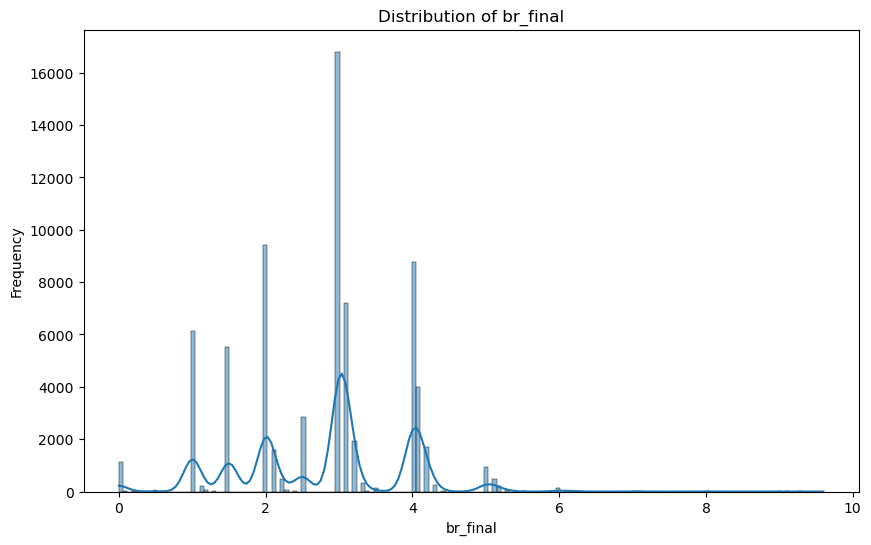

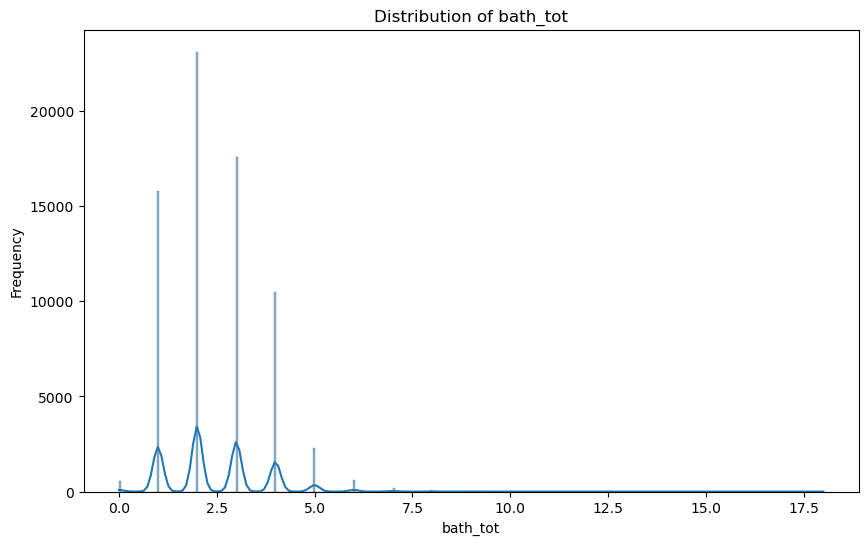

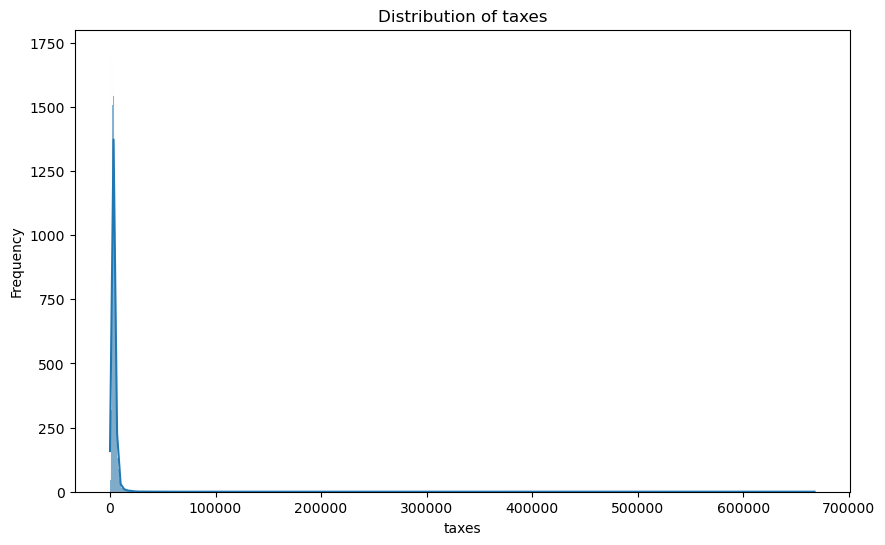

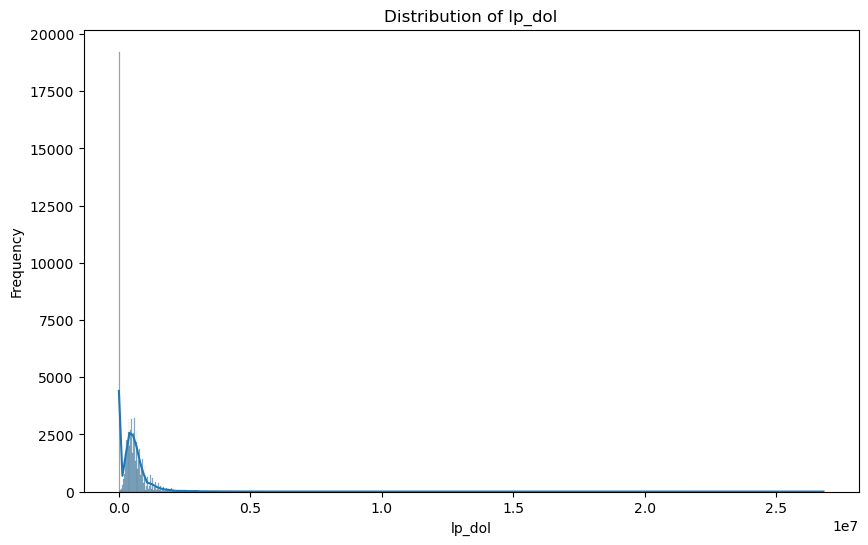

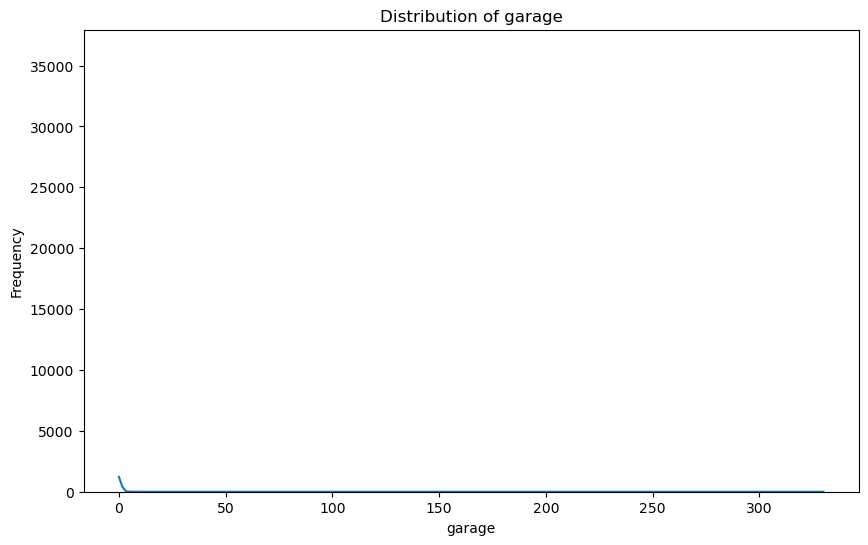

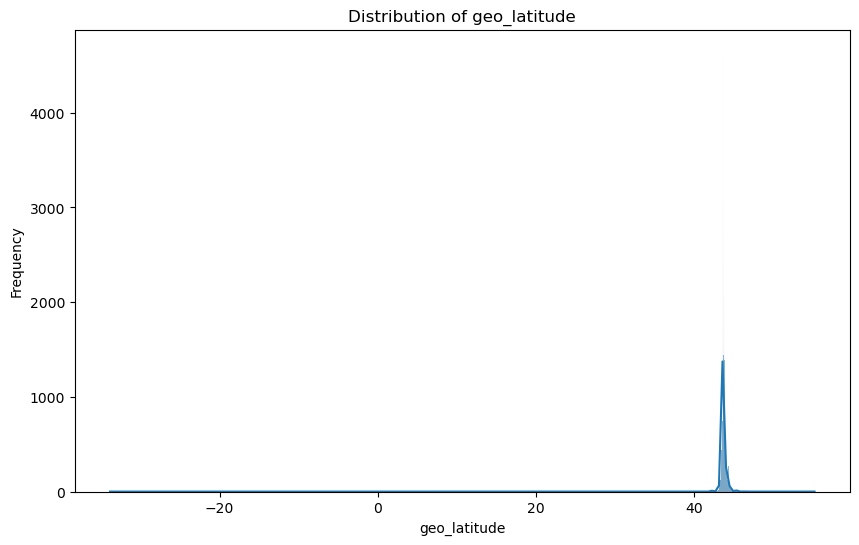

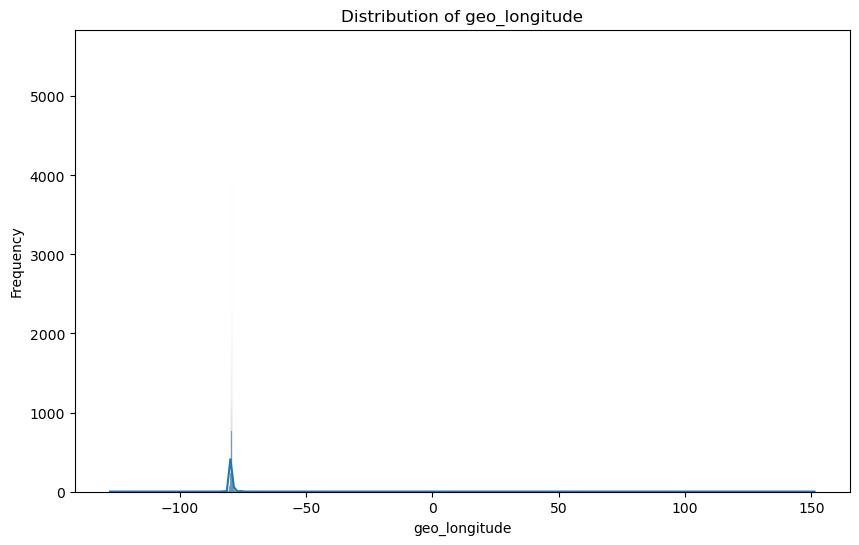

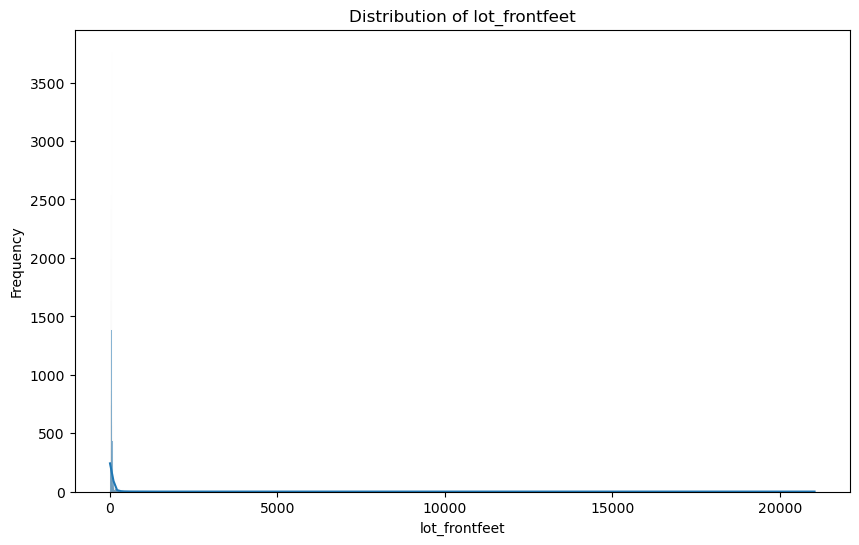

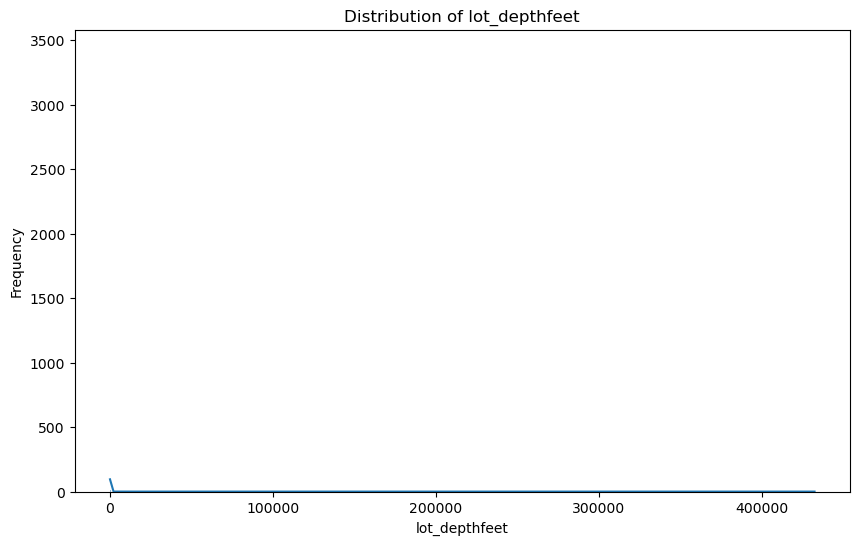

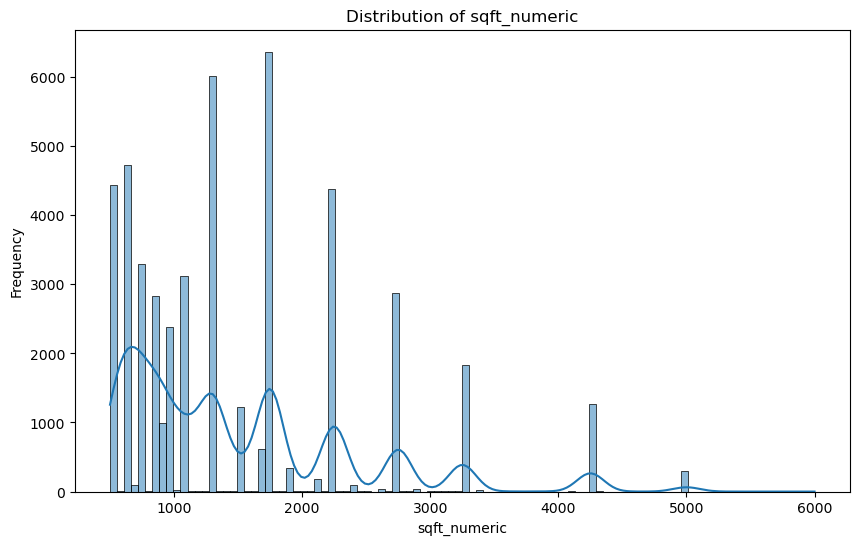

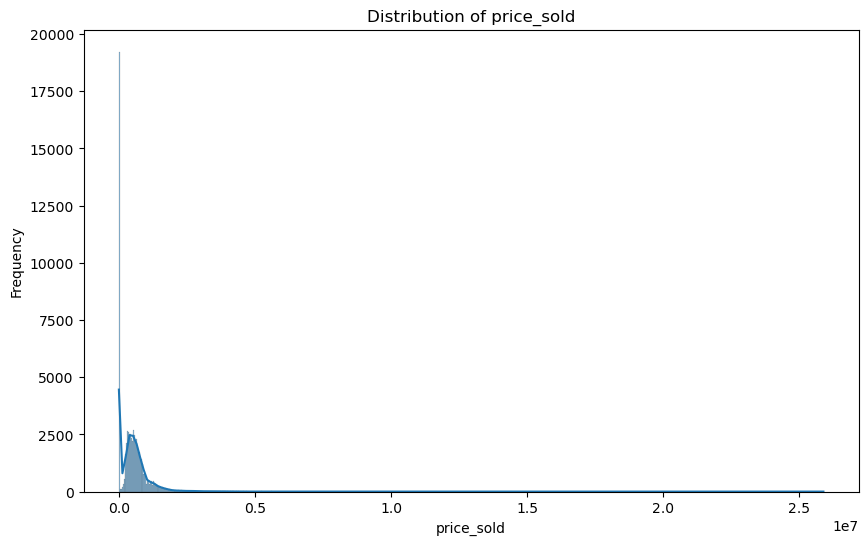

In [6]:
for feature in num_features+target:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Data imbalance
- price_sold
<nop/> <div style="width: 800px;">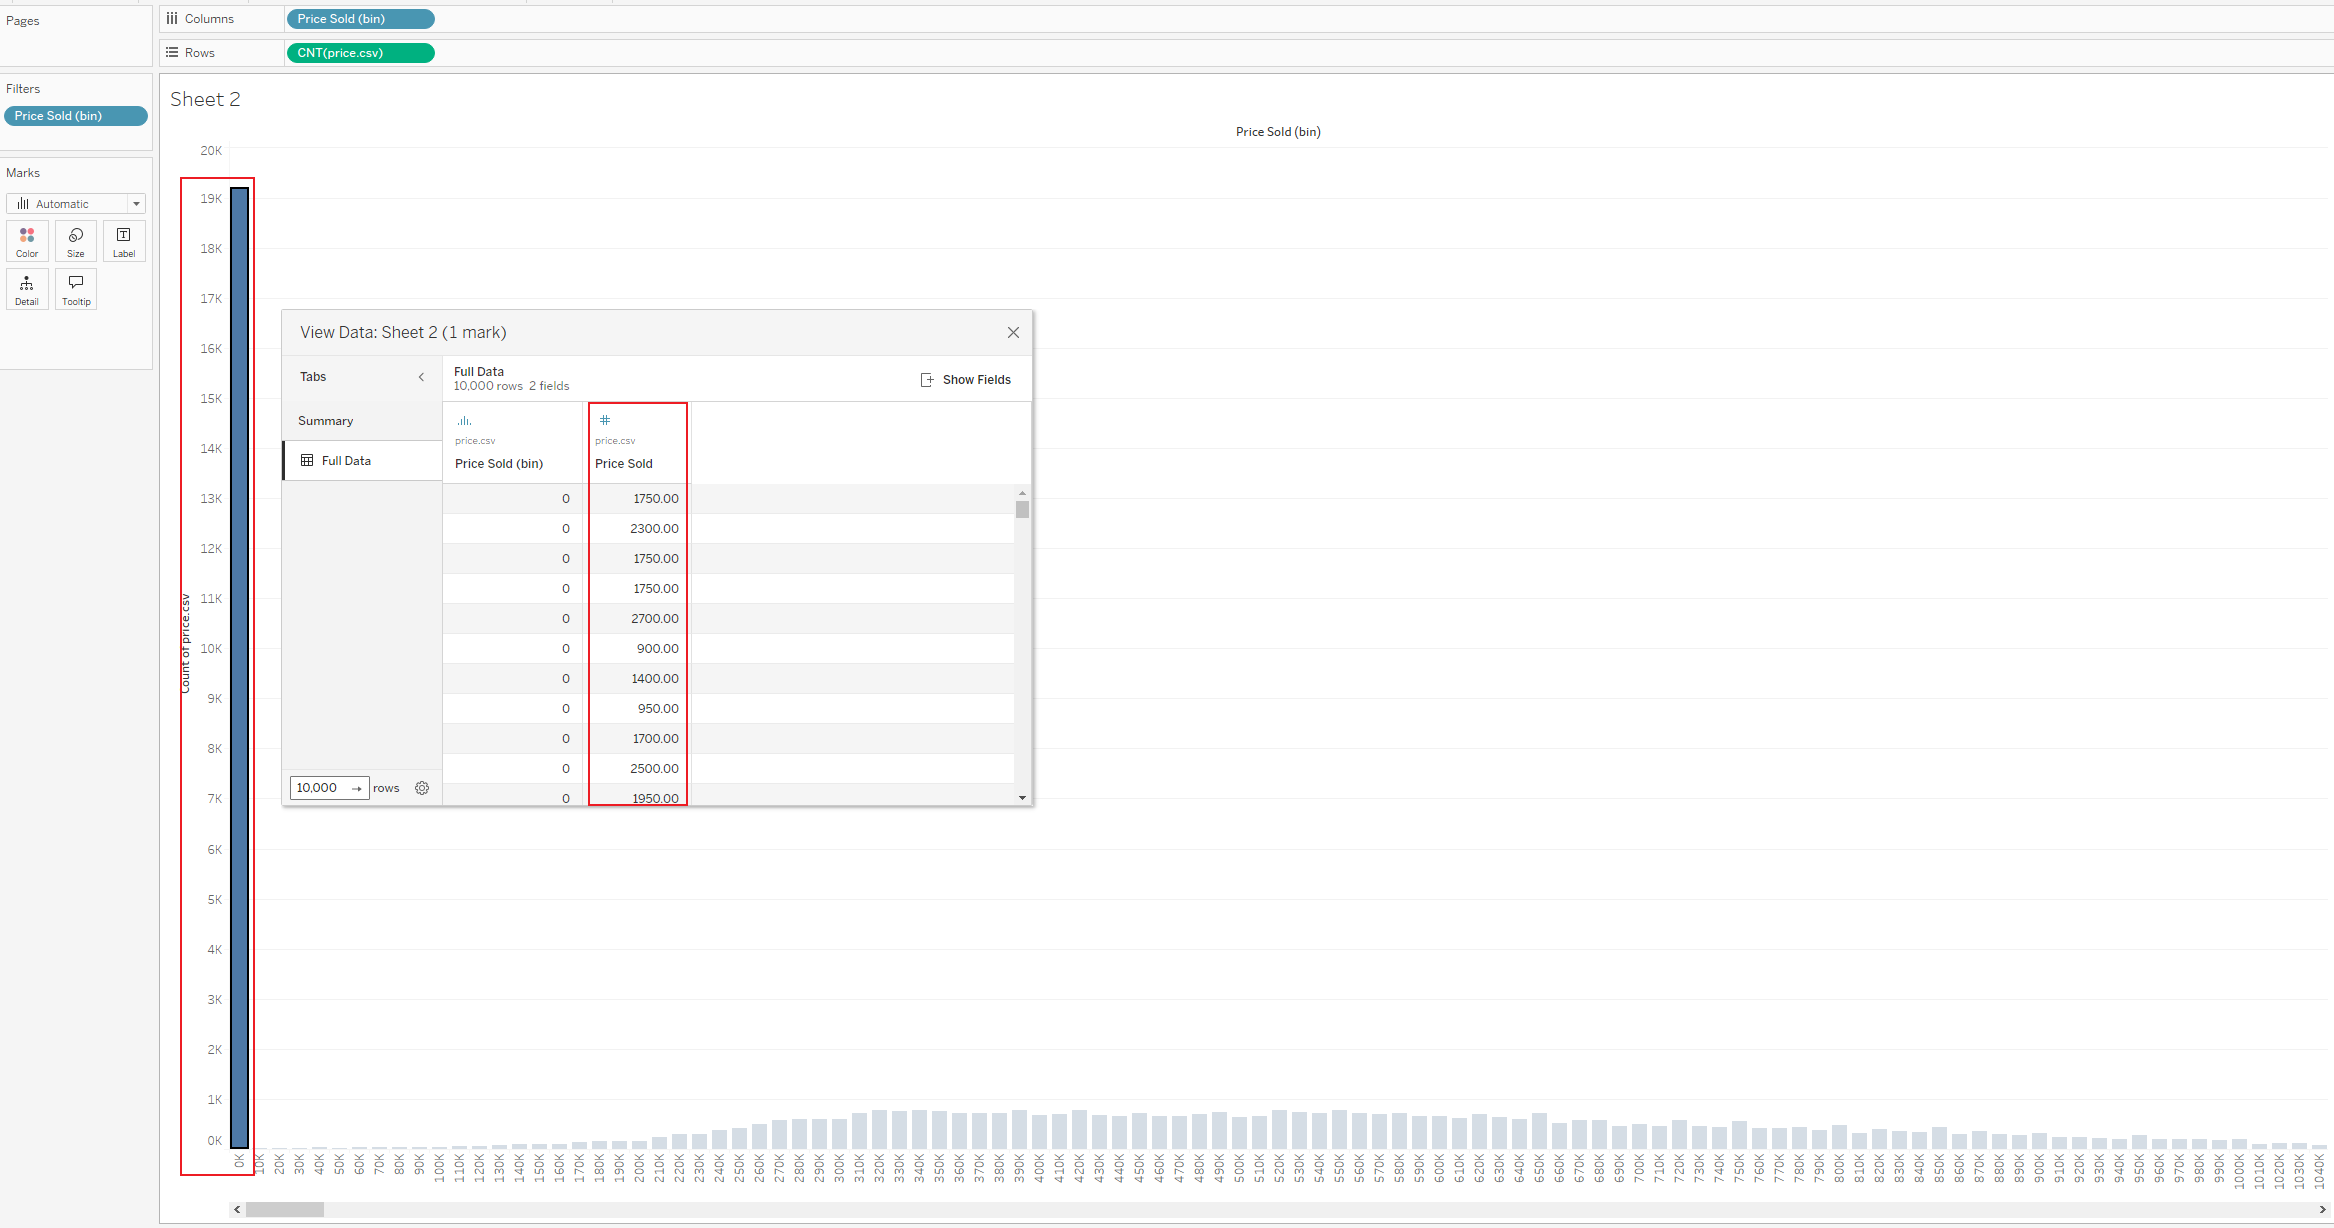</div>

- It was observed that there are 2 groups of price_sold
    - I guess they mean rent and buy/sell: {rent: '<10000', buy/sell: '>=10000'}

In [7]:
print("Rent:")
display(df[(df.price_sold<10000)].head().T)

Rent:


,9,12,35,36,37
property_type,D.,S.,D.,O.,D.
br,3.0,3.0,4.0,2.0,3.0
br_plus,NaN,NaN,NaN,1.0,NaN
br_final,3.0,3.0,4.0,2.1,3.0
bath_tot,2.0,3.0,4.0,2.0,2.0
taxes,NaN,NaN,NaN,NaN,NaN
lp_dol,1700,1700,2000,2400,3000
yr_built,6-15,NaN,NaN,NaN,NaN
gar_type,Attached,NaN,Attached,NaN,NaN
garage,2.0,0.0,2.0,0.0,0.0


In [8]:
print(f"price<10000: {sum(df.price_sold<10000)}")
print(f"price<10000 and taxes.isnull(): {df[(df.price_sold<10000)].taxes.isnull().sum()}")

price<10000: 19170
price<10000 and taxes.isnull(): 19144


In [9]:
print("Buy/Sell:")
display(df[(df.price_sold>=10000)].head().T)

Buy/Sell:


,0,1,3,6,7
property_type,D.,A.,D.,D.,S.
br,4.0,4.0,3.0,5.0,3.0
br_plus,2.0,NaN,1.0,2.0,1.0
br_final,4.2,4.0,3.1,5.2,3.1
bath_tot,4.0,3.0,3.0,4.0,2.0
taxes,4804.09,0.0,4025.75,4103.25,2573.02
lp_dol,1049900,406400,599000,1000,599000
yr_built,NaN,New,NaN,NaN,NaN
gar_type,Attached,Attached,Built-In,Attached,Detached
garage,2.0,1.0,1.0,1.0,1.0


In [10]:
print(f"price>10000: {sum(df.price_sold>10000)}")
print(f"price>10000 and taxes.notnull(): {df[(df.price_sold>10000)].taxes.notnull().sum()}")

price>10000: 51556
price>10000 and taxes.notnull(): 51342


- price<10000 -> rent -> without taxes
- price>10000 -> buy/sell -> with taxes
- Leave the taxes with null as it is meaningful

### Outliers
- lp_dol and price_sold: seems to have lots of zero problem
- lot_frontfeet and lot_depthfeet may have outliers which do not make sense

In [11]:
df[df.lot_frontfeet<1000].T

,0,1,3,6,7,8,10,11,12,14,...,73714,73716,73720,73736,73738,73742,73743,73747,73750,73755
property_type,D.,A.,D.,D.,S.,D.,D.,D.,S.,D.,...,D.,D.,D.,D.,D.,S.,D.,D.,D.,D.
br,4.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,3.0,4.0,...,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,3.0,3.0
br_plus,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,...,0.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,1.0,NaN
br_final,4.2,4.0,3.1,5.2,3.1,4.2,5.2,3.2,3.0,4.2,...,3.0,4.1,3.0,5.2,3.1,4.0,5.0,3.0,3.1,3.0
bath_tot,4.0,3.0,3.0,4.0,2.0,3.0,6.0,2.0,3.0,4.0,...,3.0,4.0,2.0,5.0,2.0,1.0,2.0,2.0,3.0,2.0
taxes,4804.09,0.0,4025.75,4103.25,2573.02,4180.46,9508.0,3825.13,NaN,4466.0,...,4461.0,4201.0,1392.0,6278.2,3207.17,NaN,6815.15,2621.0,3502.12,3997.34
lp_dol,1049900,406400,599000,1000,599000,635000,1849900,958800,1700,499800,...,599000,548800,164900,1369900,304900,3180,2445000,259900,449000,959000
yr_built,NaN,New,NaN,NaN,NaN,NaN,16-30,NaN,NaN,NaN,...,NaN,16-30,NaN,NaN,31-50,100+,100+,16-30,6-15,NaN
gar_type,Attached,Attached,Built-In,Attached,Detached,Attached,Attached,Attached,NaN,Attached,...,Attached,Attached,NaN,Attached,Carport,NaN,NaN,Attached,Attached,NaN
garage,2.0,1.0,1.0,1.0,1.0,2.0,9.0,1.0,0.0,2.0,...,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0


In [12]:
df[df.lot_frontfeet>=1000].T

,1112,5262,6574,7513,9285,9414,9665,16074,16175,17784,...,70455,70775,70792,71125,71526,71887,72208,72322,73407,73729
property_type,D.,D.,D.,D.,V.,R.,G.,R.,D.,D.,...,R.,G.,D.,V.,V.,D.,D.,D.,V.,F.
br,2.0,3.0,5.0,4.0,NaN,1.0,2.0,4.0,3.0,3.0,...,3.0,3.0,4.0,NaN,NaN,5.0,4.0,5.0,NaN,4.0
br_plus,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
br_final,2.0,3.0,5.0,4.0,0.0,1.0,2.4,4.0,3.0,3.3,...,3.0,3.0,4.0,0.0,0.0,5.0,4.0,5.0,0.0,4.0
bath_tot,3.0,3.0,3.0,3.0,0.0,0.0,3.0,1.0,1.0,4.0,...,2.0,2.0,2.0,0.0,0.0,2.0,5.0,4.0,0.0,1.0
taxes,3074.38,9047.6,4247.0,6082.63,NaN,NaN,3776.47,1246.5,1196.04,4848.13,...,4956.51,6306.82,4405.85,4000.0,3514.18,3184.11,10050.16,5842.0,498.0,1549.52
lp_dol,799000,2280000,985000,1150000,675000,475000,799900,159000,184900,1100000,...,659000,1400000,624900,359900,749000,758800,1539000,1199000,199000,239000
yr_built,NaN,NaN,6-15,100+,NaN,NaN,16-30,51-99,16-30,6-15,...,6-15,16-30,16-30,NaN,NaN,NaN,NaN,16-30,NaN,NaN
gar_type,Attached,Attached,Detached,Detached,NaN,NaN,NaN,Detached,NaN,Detached,...,Detached,Attached,Attached,NaN,NaN,Detached,Detached,Detached,NaN,NaN
garage,2.0,2.0,5.0,2.0,NaN,0.0,20.0,2.0,0.0,4.0,...,3.0,1.0,2.0,NaN,NaN,1.0,2.0,3.0,NaN,6.0


- If the outliers do not make sense, remove them
- I am not so sure so I just leave them.

### Correlation Matrix

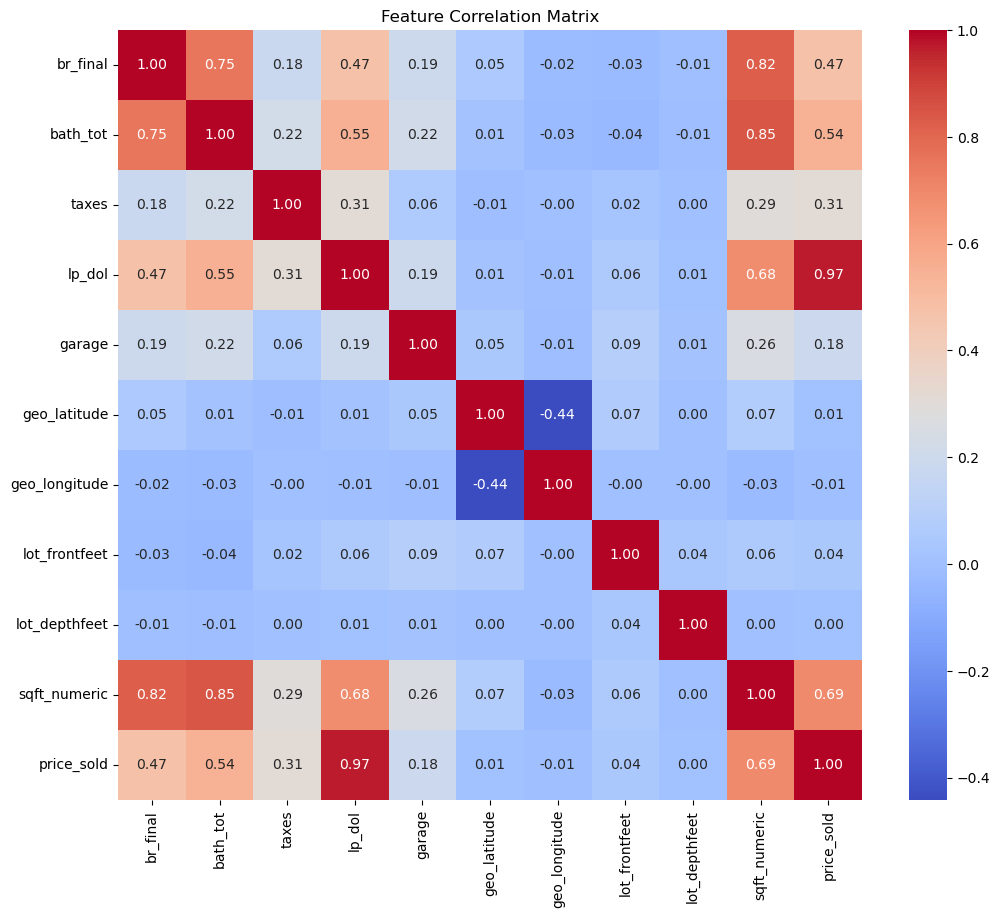

In [13]:
# Correlation Matrix
correlation_matrix = df[num_features + target].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

- br_final, bath_tot, sqft_numeric are probably important features
- pay more attention on them

### Data Leakage

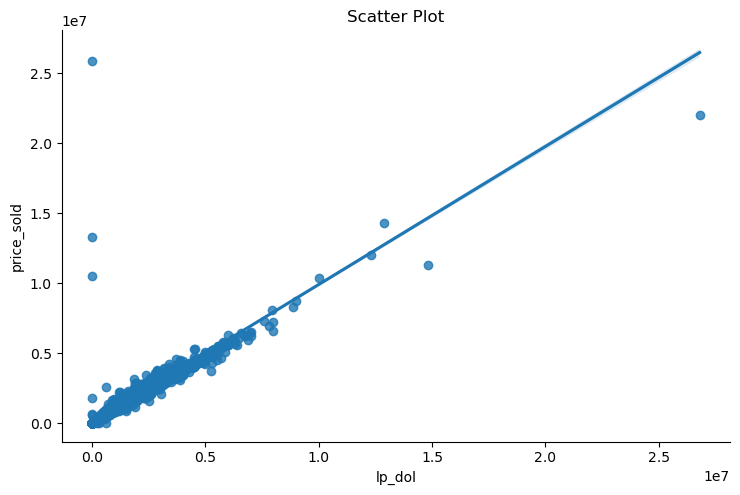

In [14]:
sns.lmplot(x='lp_dol', y='price_sold', data=df, aspect=1.5, ci=95, palette='coolwarm')
plt.xlabel('lp_dol')
plt.ylabel('price_sold')
plt.title('Scatter Plot')
plt.show()

- target price_sold has a unrealistic high +ve correlation with lp_dol
    - probably they are the same thing with the same meaning (just another currency)
    - which imply data leakage if lp_dol was used as a feature
    - To avoid data leakage, we should remove lp_dol from the dataset

In [15]:
df = df[[col for col in df.columns if col!='lp_dol']]
df.columns

Index(['property_type', 'br', 'br_plus', 'br_final', 'bath_tot', 'taxes',
       'yr_built', 'gar_type', 'garage', 'topHighschoolScoreLevel',
       'topBelowHighschoolScoreLevel', 'geo_latitude', 'geo_longitude',
       'lot_frontfeet', 'lot_depthfeet', 'sqft_numeric', 'id_community',
       'id_municipality', 'date_start', 'date_end', 'price_sold'],
      dtype='object')

## Cat features

### Data Distribution
- check the data distribution for each cat feature and target
- if there is any data imbalance
- majority and minority?

In [16]:
df[cat_features+target]

,property_type,gar_type,id_community,id_municipality,yr_built,price_sold
0,D.,Attached,713.0,10020.0,NaN,1090000.0
1,A.,Attached,232.0,10103.0,New,406400.0
3,D.,Built-In,731.0,10216.0,NaN,721000.0
6,D.,Attached,363.0,10036.0,NaN,546000.0
7,S.,Detached,105.0,10343.0,NaN,634000.0
...,...,...,...,...,...,...
99995,T.,NaN,108.0,10343.0,NaN,445000.0
99996,T.,NaN,378.0,10205.0,NaN,1700.0
99997,T.,Surface,681.0,10185.0,NaN,212000.0
99998,C.,Undergrnd,35.0,10343.0,NaN,525000.0


property_type

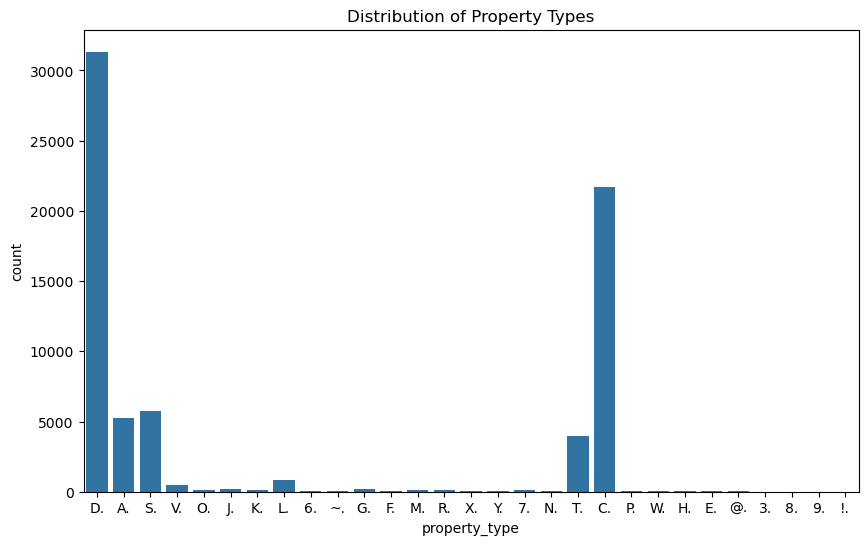

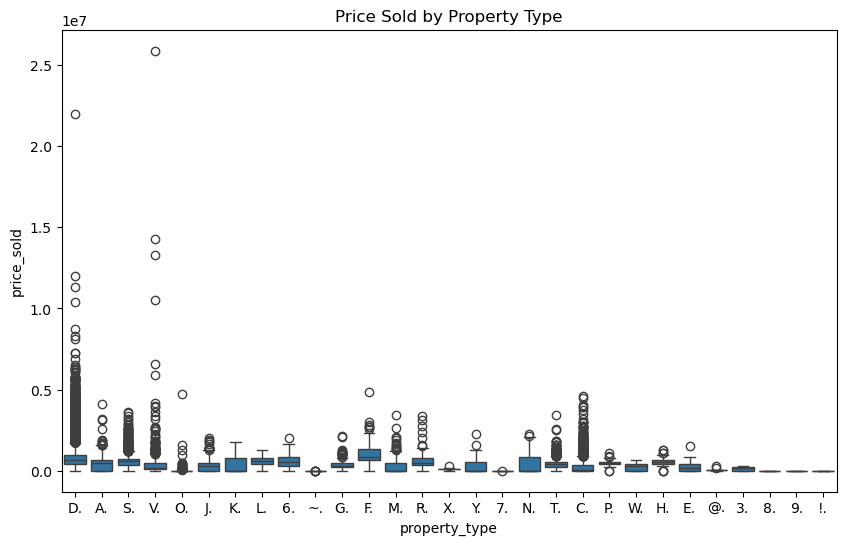

In [17]:
# Bar Plot for property_type
plt.figure(figsize=(10, 6))
sns.countplot(x='property_type', data=df)
plt.title('Distribution of Property Types')
plt.show()

# Box Plot for price_sold by property_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price_sold', data=df)
plt.title('Price Sold by Property Type')
plt.show()

- data imbalance: some small property type may have poor performance
    - upsamping on minority and downsampling on majority may be necessary
- some property types like F. has a higher median of price sold
    - implying that property type may be an important cat feature
- outliers occur in property type D and V?
    - they look making sense. Leave them.

gar_type

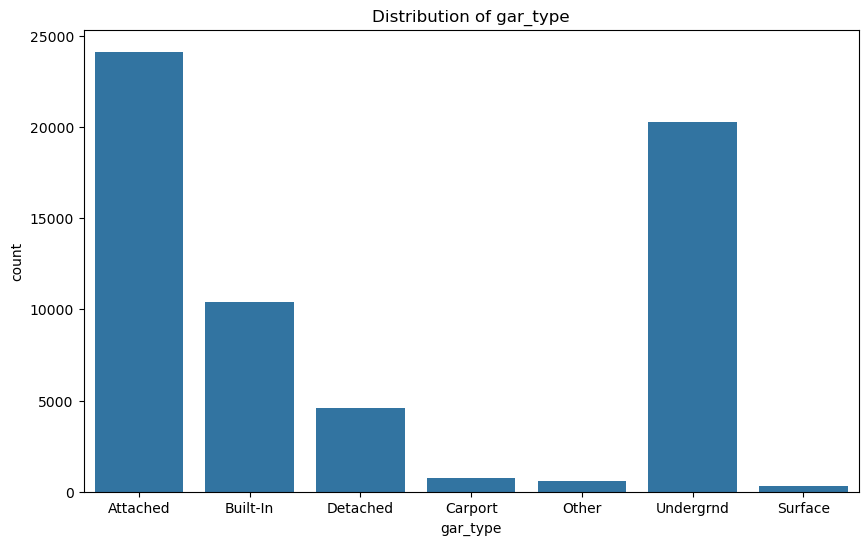

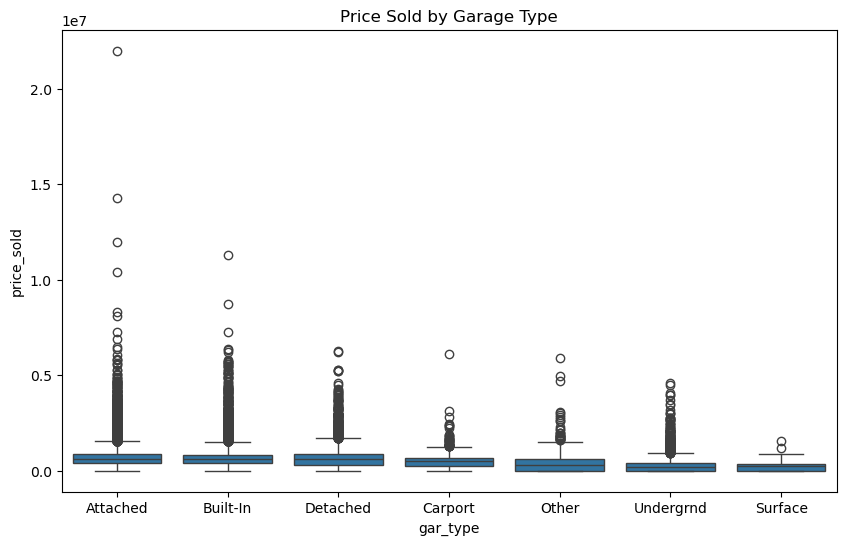

In [18]:
# Bar Plot for property_type
plt.figure(figsize=(10, 6))
sns.countplot(x='gar_type', data=df)
plt.title('Distribution of gar_type')
plt.show()

# Violin Plot for price_sold by gar_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='gar_type', y='price_sold', data=df)
plt.title('Price Sold by Garage Type')
plt.show()

- data imbalance: there are few data of underground garage wihch may result in poor prediction of this group
- Similar price median across all types of garage
    - implying that garage type may be less important
- Outliers occur in attached garage?
    - they look making sense. Leave them.

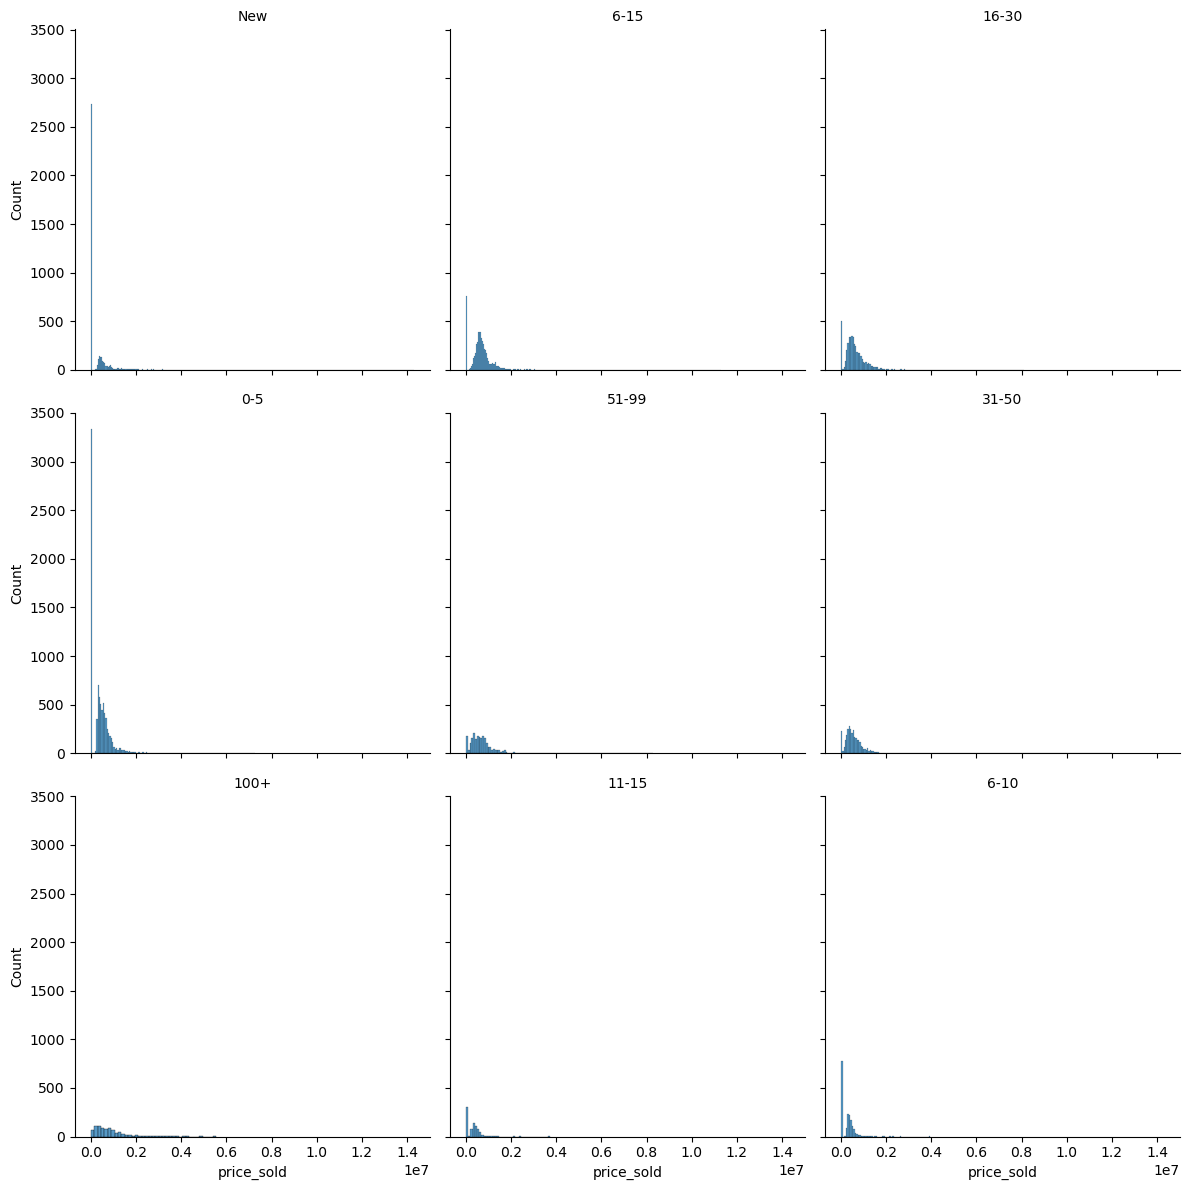

In [19]:
# Facet Grid for price_sold by yr_built
g = sns.FacetGrid(df, col="yr_built", col_wrap=3, height=4)
g.map(sns.histplot, "price_sold")
g.set_titles("{col_name}")
plt.show()

## Missing data handling
- Apart from LR which cannot handle null in features
- DTs, RF, GBTs can also handle null in features
- not compulsory to convert nan to a value/str

In [20]:
df.isnull().any()

property_type                   False
br                               True
br_plus                          True
br_final                        False
bath_tot                        False
taxes                            True
yr_built                         True
gar_type                         True
garage                           True
topHighschoolScoreLevel          True
topBelowHighschoolScoreLevel     True
geo_latitude                    False
geo_longitude                   False
lot_frontfeet                    True
lot_depthfeet                    True
sqft_numeric                     True
id_community                     True
id_municipality                  True
date_start                      False
date_end                        False
price_sold                      False
dtype: bool

br: nan->0 as br_final is 0 when br is null

In [21]:
display(df[df.br.isnull()].head())
print(f"rows of null: {sum(df.br.isnull())}")

# br: fillna(0)
df['br'] = df.br.fillna(0)
print(f"after fillna(0), checking br.isnull: {df.br.isnull().sum()}")

,property_type,br,br_plus,br_final,bath_tot,taxes,yr_built,gar_type,garage,topHighschoolScoreLevel,...,geo_latitude,geo_longitude,lot_frontfeet,lot_depthfeet,sqft_numeric,id_community,id_municipality,date_start,date_end,price_sold
30,V.,NaN,NaN,0.0,0.0,752.60,NaN,NaN,NaN,6.8,...,44.189420,-78.753260,230.0,1971.56,NaN,776.0,10291.0,2016-08-10 00:00:00,2017-04-04 00:00:00,300000.0
47,V.,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6.5,...,44.017787,-79.309504,475.0,1332.00,NaN,709.0,10366.0,2016-09-15 00:00:00,2017-03-31 00:00:00,1150000.0
62,V.,NaN,NaN,0.0,0.0,487.73,NaN,NaN,NaN,0.0,...,44.905571,-78.387424,848.0,NaN,NaN,1021.0,10142.0,2016-09-20 00:00:00,2017-01-09 00:00:00,21000.0
182,V.,NaN,NaN,0.0,0.0,4698.98,NaN,NaN,NaN,5.2,...,43.999124,-79.649685,450.0,986.00,NaN,625.0,10160.0,2016-09-20 00:00:00,2016-10-17 00:00:00,675000.0
207,V.,NaN,NaN,0.0,0.0,2100.00,NaN,NaN,NaN,0.0,...,43.580296,-80.140728,230.6,238.47,NaN,164.0,10131.0,2015-12-21 00:00:00,2016-11-18 00:00:00,250000.0


rows of null: 504
after fillna(0), checking br.isnull: 0


br_plus: same as br

In [22]:
display(df[df.br_plus.isnull()].head())
print(f"rows of null: {sum(df.br_plus.isnull())}")

# br_plus: fillna(0)
df['br_plus'] = df.br_plus.fillna(0)
print(f"after fillna(0), checking br_plus.isnull: {df.br_plus.isnull().sum()}")

,property_type,br,br_plus,br_final,bath_tot,taxes,yr_built,gar_type,garage,topHighschoolScoreLevel,...,geo_latitude,geo_longitude,lot_frontfeet,lot_depthfeet,sqft_numeric,id_community,id_municipality,date_start,date_end,price_sold
1,A.,4.0,NaN,4.0,3.0,0.00,New,Attached,1.0,0.0,...,44.316988,-79.857455,30.02,117.29,1750.0,232.0,10103.0,2016-09-25 00:00:00,2016-10-03 00:00:00,406400.0
9,D.,3.0,NaN,3.0,2.0,NaN,6-15,Attached,2.0,0.0,...,44.307744,-79.557051,NaN,NaN,1750.0,256.0,10150.0,2016-09-01 00:00:00,2016-11-20 00:00:00,1650.0
12,S.,3.0,NaN,3.0,3.0,NaN,NaN,NaN,0.0,5.8,...,43.708830,-79.757760,32.73,100.00,1750.0,351.0,10036.0,2016-08-25 00:00:00,2016-10-31 00:00:00,1700.0
16,D.,3.0,NaN,3.0,3.0,6516.00,16-30,Attached,2.0,5.7,...,43.983970,-79.488970,57.68,134.51,2250.0,715.0,10020.0,2016-09-26 00:00:00,2016-10-04 00:00:00,1181700.0
17,D.,3.0,NaN,3.0,2.0,5533.26,NaN,Built-In,1.0,0.0,...,44.203406,-79.625906,820.90,1011.00,NaN,253.0,10150.0,2016-09-22 00:00:00,2016-09-28 00:00:00,795000.0


rows of null: 42288
after fillna(0), checking br_plus.isnull: 0


taxes: 
- taxes.isnull() is meaningful -> rent -> price_sold < 10000
- leave it null

yr_built:
- too many yr_built.isnull() 
- non sense to convert nan into 0
- probably means unknown
- leave it

In [23]:
display(df[df.yr_built.isnull()].head().T)
print(f"rows of null: {sum(df.yr_built.isnull())}")

,0,3,6,7,8
property_type,D.,D.,D.,S.,D.
br,4.0,3.0,5.0,3.0,4.0
br_plus,2.0,1.0,2.0,1.0,2.0
br_final,4.2,3.1,5.2,3.1,4.2
bath_tot,4.0,3.0,4.0,2.0,3.0
taxes,4804.09,4025.75,4103.25,2573.02,4180.46
yr_built,NaN,NaN,NaN,NaN,NaN
gar_type,Attached,Built-In,Attached,Detached,Attached
garage,2.0,1.0,1.0,1.0,2.0
topHighschoolScoreLevel,8.8,7.0,5.3,0.5,6.7


rows of null: 38941


gar_type:
- gar_type.isnull() means no garage
- leave it null

In [24]:
df.garage.unique()

array([  2. ,   1. ,   9. ,   0. ,   nan,   3. ,   4. ,   7. ,   6. ,
         1.5,   5. ,  10. ,  14. ,  16. , 100. ,  20. ,   8. ,  12. ,
        11. ,  30. ,  18. ,  24. ,  22. ,  50. ,  15. ,  13. ,  79. ,
       330. ,  37. ])

garage:
- garage.isnull() means no garage (0)
- fillna(0)

In [25]:
display(df[df.garage.isnull()].head().T)
print(f"rows of null: {sum(df.garage.isnull())}")

# garage: fillna(0)
df['garage'] = df.garage.fillna(0)
print(f"after fillna(0), checking garage.isnull: {df.garage.isnull().sum()}")

,30,47,62,182,207
property_type,V.,V.,V.,V.,V.
br,0.0,0.0,0.0,0.0,0.0
br_plus,0.0,0.0,0.0,0.0,0.0
br_final,0.0,0.0,0.0,0.0,0.0
bath_tot,0.0,0.0,0.0,0.0,0.0
taxes,752.6,NaN,487.73,4698.98,2100.0
yr_built,NaN,NaN,NaN,NaN,NaN
gar_type,NaN,NaN,NaN,NaN,NaN
garage,NaN,NaN,NaN,NaN,NaN
topHighschoolScoreLevel,6.8,6.5,0.0,5.2,0.0


rows of null: 423
after fillna(0), checking garage.isnull: 0


topHighschoolScoreLevel and topBelowHighschoolScoreLevel:
- nan means unknown != 0
- leave it

In [26]:
df.topHighschoolScoreLevel.unique()

array([8.8, 0. , 7. , 5.3, 0.5, 6.7, 8. , 3.9, 5.8, 0.3, 5.7, 6.5, 7.1,
       5.9, 7.7, 8.6, 2. , 6.8, 4.2, 6.3, 6. , 9.5, 8.4, 9.9, 4. , 7.5,
       0.7, 3.7, 5.6, 6.1, 5.4, 4.8, 2.6, 1.9, 6.6, 0.4, 7.2, 1.4, 4.7,
       1.6, 6.9, 8.2, 6.4, 6.2, 4.3, 7.6, 5.2, 0.6, 1.3, 5. , 5.1, 1.1,
       8.3, 8.7, 8.1, 0.2, 1. , 7.4, 9.1, 3.2, 0.8, 7.8, 9.2, 2.1, 3.6,
       2.5, 9.6, 1.5, 9.3, 9. , 4.5, 4.6, nan, 4.9, 3.4, 3.3, 2.9])

lot_frontfeet and lot_depthfeet:
- nan means unknown != 0
- leave it

id_community and id_municipality
- null means unknown
- leave it

sqft_numeric:
- need to pay more attention on it due to the high correlation shown in the correlation matrix
- use Data imputation with mean of property_type to fillna

In [27]:
display(df[df.sqft_numeric.isnull()].head().T)
print(f"rows of null: {sum(df.sqft_numeric.isnull())}")

,0,3,7,8,11
property_type,D.,D.,S.,D.,D.
br,4.0,3.0,3.0,4.0,3.0
br_plus,2.0,1.0,1.0,2.0,2.0
br_final,4.2,3.1,3.1,4.2,3.2
bath_tot,4.0,3.0,2.0,3.0,2.0
taxes,4804.09,4025.75,2573.02,4180.46,3825.13
yr_built,NaN,NaN,NaN,NaN,NaN
gar_type,Attached,Built-In,Detached,Attached,Attached
garage,2.0,1.0,1.0,2.0,1.0
topHighschoolScoreLevel,8.8,7.0,0.5,6.7,3.9


rows of null: 23059


### Data Imputation

topHighschoolScoreLevel and topBelowHighschoolScoreLevel:
- nan means unknown != 0
- leave it

In [28]:
mean_sqft_numeric = df.groupby(['property_type'])['sqft_numeric'].mean().reset_index().rename(columns={'sqft_numeric': 'mean_sqft_numeric'})
display(mean_sqft_numeric.head())

df = pd.merge(df, mean_sqft_numeric, on=['property_type'], how='left')
df.loc[df['sqft_numeric'].isnull(), 'sqft_numeric'] = df.loc[df['sqft_numeric'].isnull(), 'mean_sqft_numeric']
df = df[df.columns[:-1]]
df.head().T

,property_type,mean_sqft_numeric
0,!.,1699.000000
1,3.,822.076923
2,6.,2264.285714
3,7.,1048.142857
4,8.,1300.000000


,0,1,2,3,4
property_type,D.,A.,D.,D.,S.
br,4.0,4.0,3.0,5.0,3.0
br_plus,2.0,0.0,1.0,2.0,1.0
br_final,4.2,4.0,3.1,5.2,3.1
bath_tot,4.0,3.0,3.0,4.0,2.0
taxes,4804.09,0.0,4025.75,4103.25,2573.02
yr_built,NaN,New,NaN,NaN,NaN
gar_type,Attached,Attached,Built-In,Attached,Detached
garage,2.0,1.0,1.0,1.0,1.0
topHighschoolScoreLevel,8.8,0.0,7.0,5.3,0.5


# Feature Engineering
lot_size = lot_frontfeet*lot_depthfeet

In [29]:
df['lot_size'] = df['lot_frontfeet']*df['lot_depthfeet']

yr_built:
- data preprocessing: New to 0
- feature engineering: cat feature to num feature. more meaningful to a ML model

In [30]:
df.yr_built.unique()

array([nan, 'New', '6-15', '16-30', '0-5', '51-99', '31-50', '100+',
       '11-15', '6-10'], dtype=object)

In [31]:
# 'New' to '0'
df['yr_built'] = df['yr_built'].replace({'New': '0'})

In [32]:
# cat feature to num feature
yr_built_str_to_int = {'16-30': 23, '6-15':10, '0-5':2, '51-99': 75, '31-50': 40, '100+': 100, '11-15': 13, '6-10': 8}
df['yr_built'] = df['yr_built'].replace(yr_built_str_to_int).astype(float)
df['yr_built'].unique()

array([ nan,   0.,  10.,  23.,   2.,  75.,  40., 100.,  13.,   8.])

In [33]:
df.dtypes

property_type                    object
br                              float64
br_plus                         float64
br_final                        float64
bath_tot                        float64
taxes                           float64
yr_built                        float64
gar_type                         object
garage                          float64
topHighschoolScoreLevel         float64
topBelowHighschoolScoreLevel    float64
geo_latitude                    float64
geo_longitude                   float64
lot_frontfeet                   float64
lot_depthfeet                   float64
sqft_numeric                    float64
id_community                    float64
id_municipality                 float64
date_start                       object
date_end                         object
price_sold                      float64
lot_size                        float64
dtype: object

# Train Valid Split
- randomly split it

In [34]:
target = ['price_sold']
cat_features = ['property_type', 'gar_type', 'id_community', 'id_municipality']
num_features = ['br_final', 'bath_tot', 'taxes', 'yr_built', 'garage', 'topHighschoolScoreLevel', 'topBelowHighschoolScoreLevel', 'geo_latitude', 'geo_longitude', 'lot_size', 'sqft_numeric']

print(f"target: {target}")
print(f"cat_features: {cat_features}")
print(f"num_features: {num_features}\n")

target: ['price_sold']
cat_features: ['property_type', 'gar_type', 'id_community', 'id_municipality']
num_features: ['br_final', 'bath_tot', 'taxes', 'yr_built', 'garage', 'topHighschoolScoreLevel', 'topBelowHighschoolScoreLevel', 'geo_latitude', 'geo_longitude', 'lot_size', 'sqft_numeric']



In [35]:
from sklearn.model_selection import train_test_split

X = df[cat_features+num_features]
y = df[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(f'Train set size: {X_train.shape}')
print(f'Valid set size: {X_valid.shape}')

# perserve the idx
train_idx = X_train.index
valid_idx = X_valid.index

Train set size: (56584, 15)
Valid set size: (14147, 15)


# Encode for cat features
- one-hot encode (not suggested): sparse matrix -> result in curse of dimensionality as the data size is not big
- label encode (not suggested): cannot handle unknown values in unseen dataset
- Ordinal encode: can handle unknown values in unseen dataset (-1) while tree based models can handle ordinal relationship between categories and do not affect the tree splitting

In [36]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [37]:
# Label encode
X_train_cat = X_train[cat_features].copy()
X_valid_cat = X_valid[cat_features].copy()

for col in cat_features:
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    # Fit on the train set and transform both train and valid sets
    X_train_cat[col] = encoder.fit_transform(X_train[[col]])
    X_valid_cat[col] = encoder.transform(X_valid[[col]])

print(f"df_cat_train: {X_train_cat.shape}")
print(f"df_cat_test: {X_valid_cat.shape}")

df_cat_train: (56584, 4)
df_cat_test: (14147, 4)


# Standardize the num features

In [38]:
# Standardize the num features
scaler = StandardScaler()
# Fit on the train set and transform both train and test sets
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_features]), columns=num_features, index=train_idx)
X_valid_num = pd.DataFrame(scaler.transform(X_valid[num_features]), columns=num_features, index=valid_idx)

print(f"df_num_train: {X_train_num.shape}")
print(f"df_num_test: {X_valid_num.shape}")

df_num_train: (56584, 11)
df_num_test: (14147, 11)


In [39]:
X_train_encoded = pd.concat([X_train_cat, X_train_num], axis=1)
X_valid_encoded = pd.concat([X_valid_cat, X_valid_num], axis=1)
X_full_encoded = pd.concat([X_train_encoded, X_valid_encoded], axis=0).sort_index()

print(f"df_train: {X_train_encoded.shape}")
print(f"df_valid: {X_valid_encoded.shape}")
print(f"df_full_encoded: {X_full_encoded.shape}")

df_train: (56584, 15)
df_valid: (14147, 15)
df_full_encoded: (70731, 15)


In [40]:
X_full_encoded

,property_type,gar_type,id_community,id_municipality,br_final,bath_tot,taxes,yr_built,garage,topHighschoolScoreLevel,topBelowHighschoolScoreLevel,geo_latitude,geo_longitude,lot_size,sqft_numeric
0,9.0,0.0,611.0,15.0,1.295161,1.267631,0.156764,NaN,0.650333,1.425769,-0.492671,0.643808,-0.003241,-0.066146,0.766858
1,7.0,0.0,217.0,66.0,1.113184,0.442417,-0.629827,-0.749534,-0.171639,-1.366209,-0.304859,1.508128,-0.315129,-0.077026,0.027124
2,9.0,1.0,628.0,146.0,0.294285,0.442417,0.029324,NaN,-0.171639,0.854683,-0.398765,0.792792,0.038431,-0.043595,0.766858
3,9.0,0.0,340.0,27.0,2.205049,1.267631,0.042013,NaN,-0.171639,0.315324,-0.915248,-0.138235,-0.188201,-0.060283,0.027124
4,22.0,3.0,103.0,235.0,0.294285,-0.382798,-0.208537,NaN,-0.171639,-1.207574,-0.962201,-0.245491,0.004937,-0.080105,0.025893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70726,23.0,NaN,106.0,235.0,-0.706591,-1.208012,-0.300909,NaN,-0.993611,-1.271028,1.009825,-0.289253,0.023587,NaN,-0.746946
70727,23.0,NaN,351.0,138.0,-0.706591,0.442417,NaN,NaN,-0.993611,-0.001947,0.023812,-0.602577,-0.216963,NaN,-0.746946
70728,23.0,5.0,583.0,125.0,-1.616478,-1.208012,-0.384227,NaN,-0.171639,0.251869,0.681154,0.349494,0.197410,NaN,-1.400922
70729,8.0,6.0,33.0,235.0,-1.161534,-0.382798,-0.122253,NaN,-0.171639,-1.207574,-1.431730,-0.350017,0.102149,NaN,-1.044207


In [41]:
df

,property_type,br,br_plus,br_final,bath_tot,taxes,yr_built,gar_type,garage,topHighschoolScoreLevel,...,geo_longitude,lot_frontfeet,lot_depthfeet,sqft_numeric,id_community,id_municipality,date_start,date_end,price_sold,lot_size
0,D.,4.0,2.0,4.2,4.0,4804.09,NaN,Attached,2.0,8.8,...,-79.486380,50.00,110.64,2372.122339,713.0,10020.0,2016-09-20 00:00:00,2016-10-02 00:00:00,1090000.0,5532.0000
1,A.,4.0,0.0,4.0,3.0,0.00,0.0,Attached,1.0,0.0,...,-79.857455,30.02,117.29,1750.000000,232.0,10103.0,2016-09-25 00:00:00,2016-10-03 00:00:00,406400.0,3521.0458
2,D.,3.0,1.0,3.1,3.0,4025.75,NaN,Built-In,1.0,7.0,...,-79.436800,50.00,194.00,2372.122339,731.0,10216.0,2016-09-21 00:00:00,2016-09-28 00:00:00,721000.0,9700.0000
3,D.,5.0,2.0,5.2,4.0,4103.25,NaN,Attached,1.0,5.3,...,-79.706440,55.13,120.00,1750.000000,363.0,10036.0,2016-09-21 00:00:00,2016-10-12 00:00:00,546000.0,6615.6000
4,S.,3.0,1.0,3.1,2.0,2573.02,NaN,Detached,1.0,0.5,...,-79.476650,24.60,120.00,1748.963936,105.0,10343.0,2016-09-21 00:00:00,2016-09-25 00:00:00,634000.0,2952.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70726,T.,2.0,0.0,2.0,1.0,2008.86,NaN,NaN,0.0,0.3,...,-79.454460,NaN,NaN,1099.000000,108.0,10343.0,2016-09-07 00:00:00,2016-09-16 00:00:00,445000.0,NaN
70727,T.,2.0,0.0,2.0,3.0,NaN,NaN,NaN,0.0,4.3,...,-79.740660,NaN,NaN,1099.000000,378.0,10205.0,2016-07-06 00:00:00,2016-07-13 00:00:00,1700.0,NaN
70728,T.,1.0,0.0,1.0,1.0,1500.00,NaN,Surface,1.0,5.1,...,-79.247650,NaN,NaN,549.000000,681.0,10185.0,2016-06-03 00:00:00,2016-06-16 00:00:00,212000.0,NaN
70729,C.,1.0,1.0,1.5,2.0,3100.00,NaN,Undergrnd,1.0,0.5,...,-79.360990,NaN,NaN,849.000000,35.0,10343.0,2016-05-13 00:00:00,2016-06-15 00:00:00,525000.0,NaN


In [42]:
y

,price_sold
0,1090000.0
1,406400.0
2,721000.0
3,546000.0
4,634000.0
...,...
70726,445000.0
70727,1700.0
70728,212000.0
70729,525000.0


# Training
## 1. Decision Tree (DT)

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)

dt.fit(X_train_encoded, y_train)
y_pred_dt = dt.predict(X_full_encoded)
print(f"y_pred.shape: {y_pred_dt.shape}")
y_pred_dt

y_pred.shape: (70731,)


array([1090000.,  406400.,  721000., ...,  212000.,  525000.,  385000.])

## 2. Random Forest (RF)

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=SEED)

rf.fit(X_train_encoded, y_train)
y_pred_rf = rf.predict(X_full_encoded)
print(f"y_pred.shape: {y_pred_rf.shape}")
y_pred_dt

c:\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


y_pred.shape: (70731,)


array([1090000.,  406400.,  721000., ...,  212000.,  525000.,  385000.])

## 3. XGBoost

In [45]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=SEED)

xgb.fit(X_train_encoded, y_train)
y_pred_xgb = xgb.predict(X_full_encoded)
print(f"y_pred.shape: {y_pred_xgb.shape}")
y_pred_xgb

y_pred.shape: (70731,)


array([1112703.5 ,  384369.5 ,  737730.2 , ...,  256235.39,  566663.94,
        362894.44], dtype=float32)

## 4. LightGBM

In [46]:
import lightgbm
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=SEED)

lgbm.fit(X_train_encoded, y_train)
y_pred_lgbm = lgbm.predict(X_full_encoded)
print(f"y_pred.shape: {y_pred_lgbm.shape}")
y_pred_lgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1874
[LightGBM] [Info] Number of data points in the train set: 56584, number of used features: 15
[LightGBM] [Info] Start training from score 514641.005496
y_pred.shape: (70731,)


array([966040.28911325, 428364.06695609, 741173.43938006, ...,
       249874.3041628 , 531374.17732964, 355326.58981287])

# Evaluation
## Metric (RMSE)
RMSE:
- penalize larger errors more heavily
- as it squares the errors before averaging, which means that larger errors contribute more to the final metric than smaller ones.
- Therefore, RMSE is sensitive to outliers due to the squaring of errors.

MSE:
- Like RMSE, MSE penalize larger errors more heavily and is sensitive to outliers
- but it less intuitive compared to RMSE and MAE as the error are squared (not in the same units as the target)

MAE:
- each error to contribute equally to the metric, regardless of its magnitude.
- less sensitive to outliers compared to RMSE or MSE
- good choice when the data contains outliers.



Therefore, RMSE was used.

## Model Comparison

In [47]:
from sklearn.metrics import root_mean_squared_error

# Evaluate the model
# Dt
rmse_train_dt = root_mean_squared_error(y_train, pd.Series(y_pred_dt).loc[train_idx])
rmse_valid_dt = root_mean_squared_error(y_valid, pd.Series(y_pred_dt).loc[valid_idx])
print("Decision Tree:")
print(f'rmse train of DT: {rmse_train_dt:.2f}')
print(f'rmse valid of DT: {rmse_valid_dt:.2f}\n')

# RF
rmse_train_rf = root_mean_squared_error(y_train, pd.Series(y_pred_rf).loc[train_idx])
rmse_valid_rf = root_mean_squared_error(y_valid, pd.Series(y_pred_rf).loc[valid_idx])
print("Random Forest:")
print(f'rmse train of DT: {rmse_train_rf:.2f}')
print(f'rmse valid of DT: {rmse_valid_rf:.2f}\n')

# XGBoost
rmse_train_xgb = root_mean_squared_error(y_train, pd.Series(y_pred_xgb).loc[train_idx])
rmse_valid_xgb = root_mean_squared_error(y_valid, pd.Series(y_pred_xgb).loc[valid_idx])
print("XGBoost:")
print(f'rmse train of DT: {rmse_train_xgb:.2f}')
print(f'rmse valid of DT: {rmse_valid_xgb:.2f}\n')

# LightGBM
rmse_train_lgbm = root_mean_squared_error(y_train, pd.Series(y_pred_lgbm).loc[train_idx])
rmse_valid_lgbm = root_mean_squared_error(y_valid, pd.Series(y_pred_lgbm).loc[valid_idx])
print("LightGBM:")
print(f'rmse train of DT: {rmse_train_lgbm:.2f}')
print(f'rmse valid of DT: {rmse_valid_lgbm:.2f}')

Decision Tree:
rmse train of DT: 31493.48
rmse valid of DT: 363320.66

Random Forest:
rmse train of DT: 71916.09
rmse valid of DT: 249393.68

XGBoost:
rmse train of DT: 86859.99
rmse valid of DT: 248961.84

LightGBM:
rmse train of DT: 142928.67
rmse valid of DT: 244888.15


- Overfitting occcurs in all 4 models.
    - train rmse < valid rmse a lot
- Random Forest, XGBoost, and LightGBM also have a low RMSE on valid set (LightGBM has the lowest RMSE on the valid set)
    - They generalizes better than Decision Tree on unseen data. 
- LightGBM's RMSE on the train set is higher compared to the other models
    - LightGBM is less likely to be overfitting compared to other models, which have a very low train RMSE but a very high valid RMSE
- Therefore, LightGBM is the best model.

In [48]:
df['y_pred_lgbm'] = y_pred_lgbm
df["train_valid"] = "train"
df.loc[valid_idx, "train_valid"] = "valid"

display(df.head().T)
df.to_csv("price_lgbm_result.csv", index=None)

,0,1,2,3,4
property_type,D.,A.,D.,D.,S.
br,4.0,4.0,3.0,5.0,3.0
br_plus,2.0,0.0,1.0,2.0,1.0
br_final,4.2,4.0,3.1,5.2,3.1
bath_tot,4.0,3.0,3.0,4.0,2.0
taxes,4804.09,0.0,4025.75,4103.25,2573.02
yr_built,NaN,0.0,NaN,NaN,NaN
gar_type,Attached,Attached,Built-In,Attached,Detached
garage,2.0,1.0,1.0,1.0,1.0
topHighschoolScoreLevel,8.8,0.0,7.0,5.3,0.5


## Feature Importance
Gain and Split are also important in LightGBM.

### Gain
- The contribution of a feature to the model by calculating the improvement in accuracy that the feature adds to the branches it is involved in
- It reflects the total reduction in the loss function brought by a feature across all the splits in which it appears.
- A higher gain value indicates that the feature is more important for making predictions, as it contributes significantly to reducing the error.

### Split
- The number of times a feature is used to split the data across all the trees in the model. It counts how often a feature is chosen as the splitting criterion in the decision trees.
- A feature with a high split count is frequently used in the decision-making process of the trees, indicating that it might be important for the model. 
- However, it does not necessarily mean it has a strong influence on the predictive power, as it might be selected often but contribute little to the overall gain.

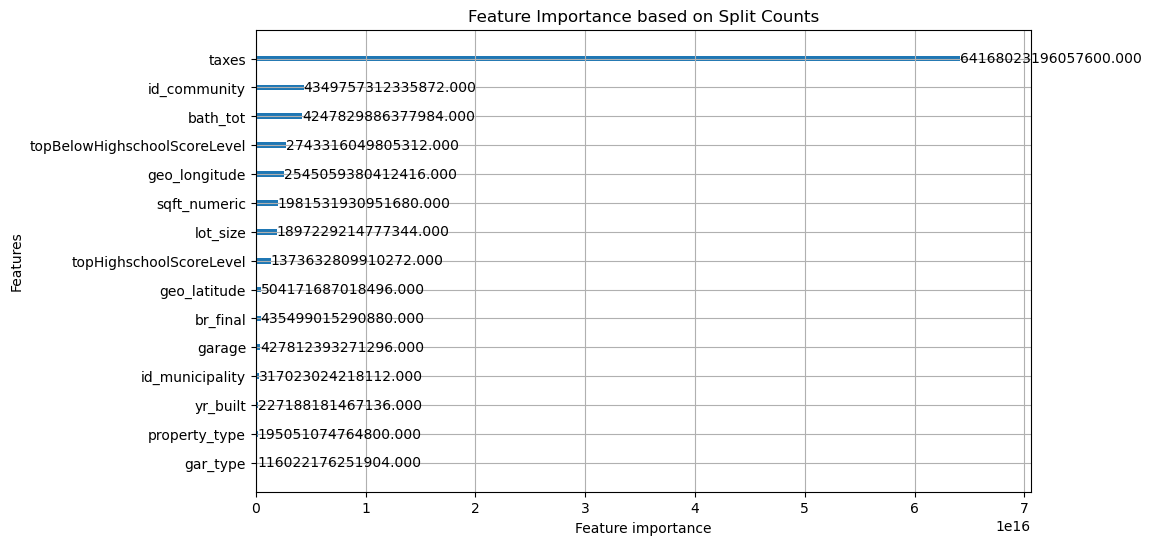

In [49]:
# Plot feature importance based on gain
lightgbm.plot_importance(lgbm, importance_type='gain', max_num_features=20, figsize=(10, 6))
plt.title('Feature Importance based on Split Counts')
plt.show()

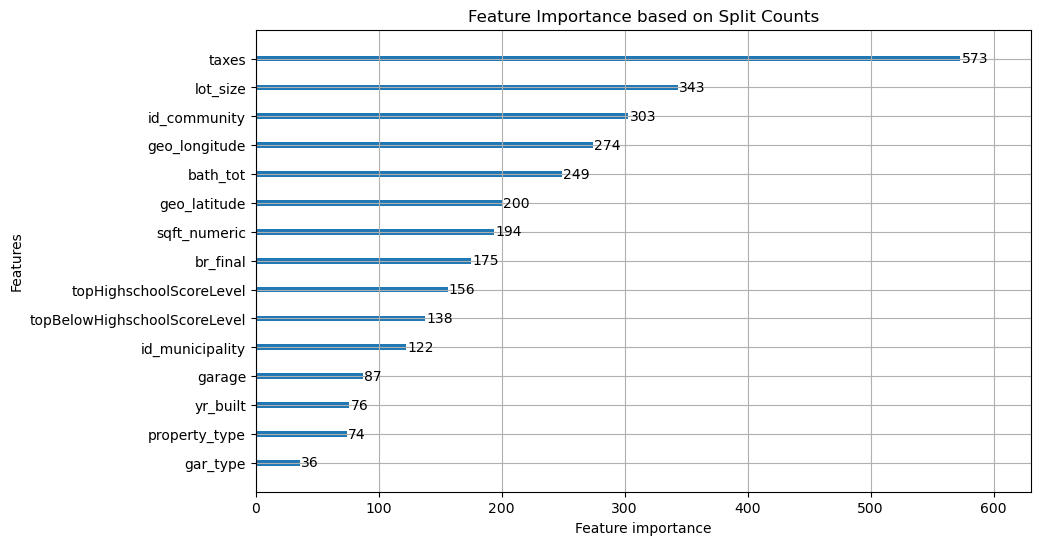

In [50]:
# Plot feature importance based on split counts
lightgbm.plot_importance(lgbm, importance_type='split', max_num_features=20, figsize=(10, 6))
plt.title('Feature Importance based on Split Counts')
plt.show()

Taxes is the most important feature.

## Result Analysis

<nop/> <div style="width: 1400px;">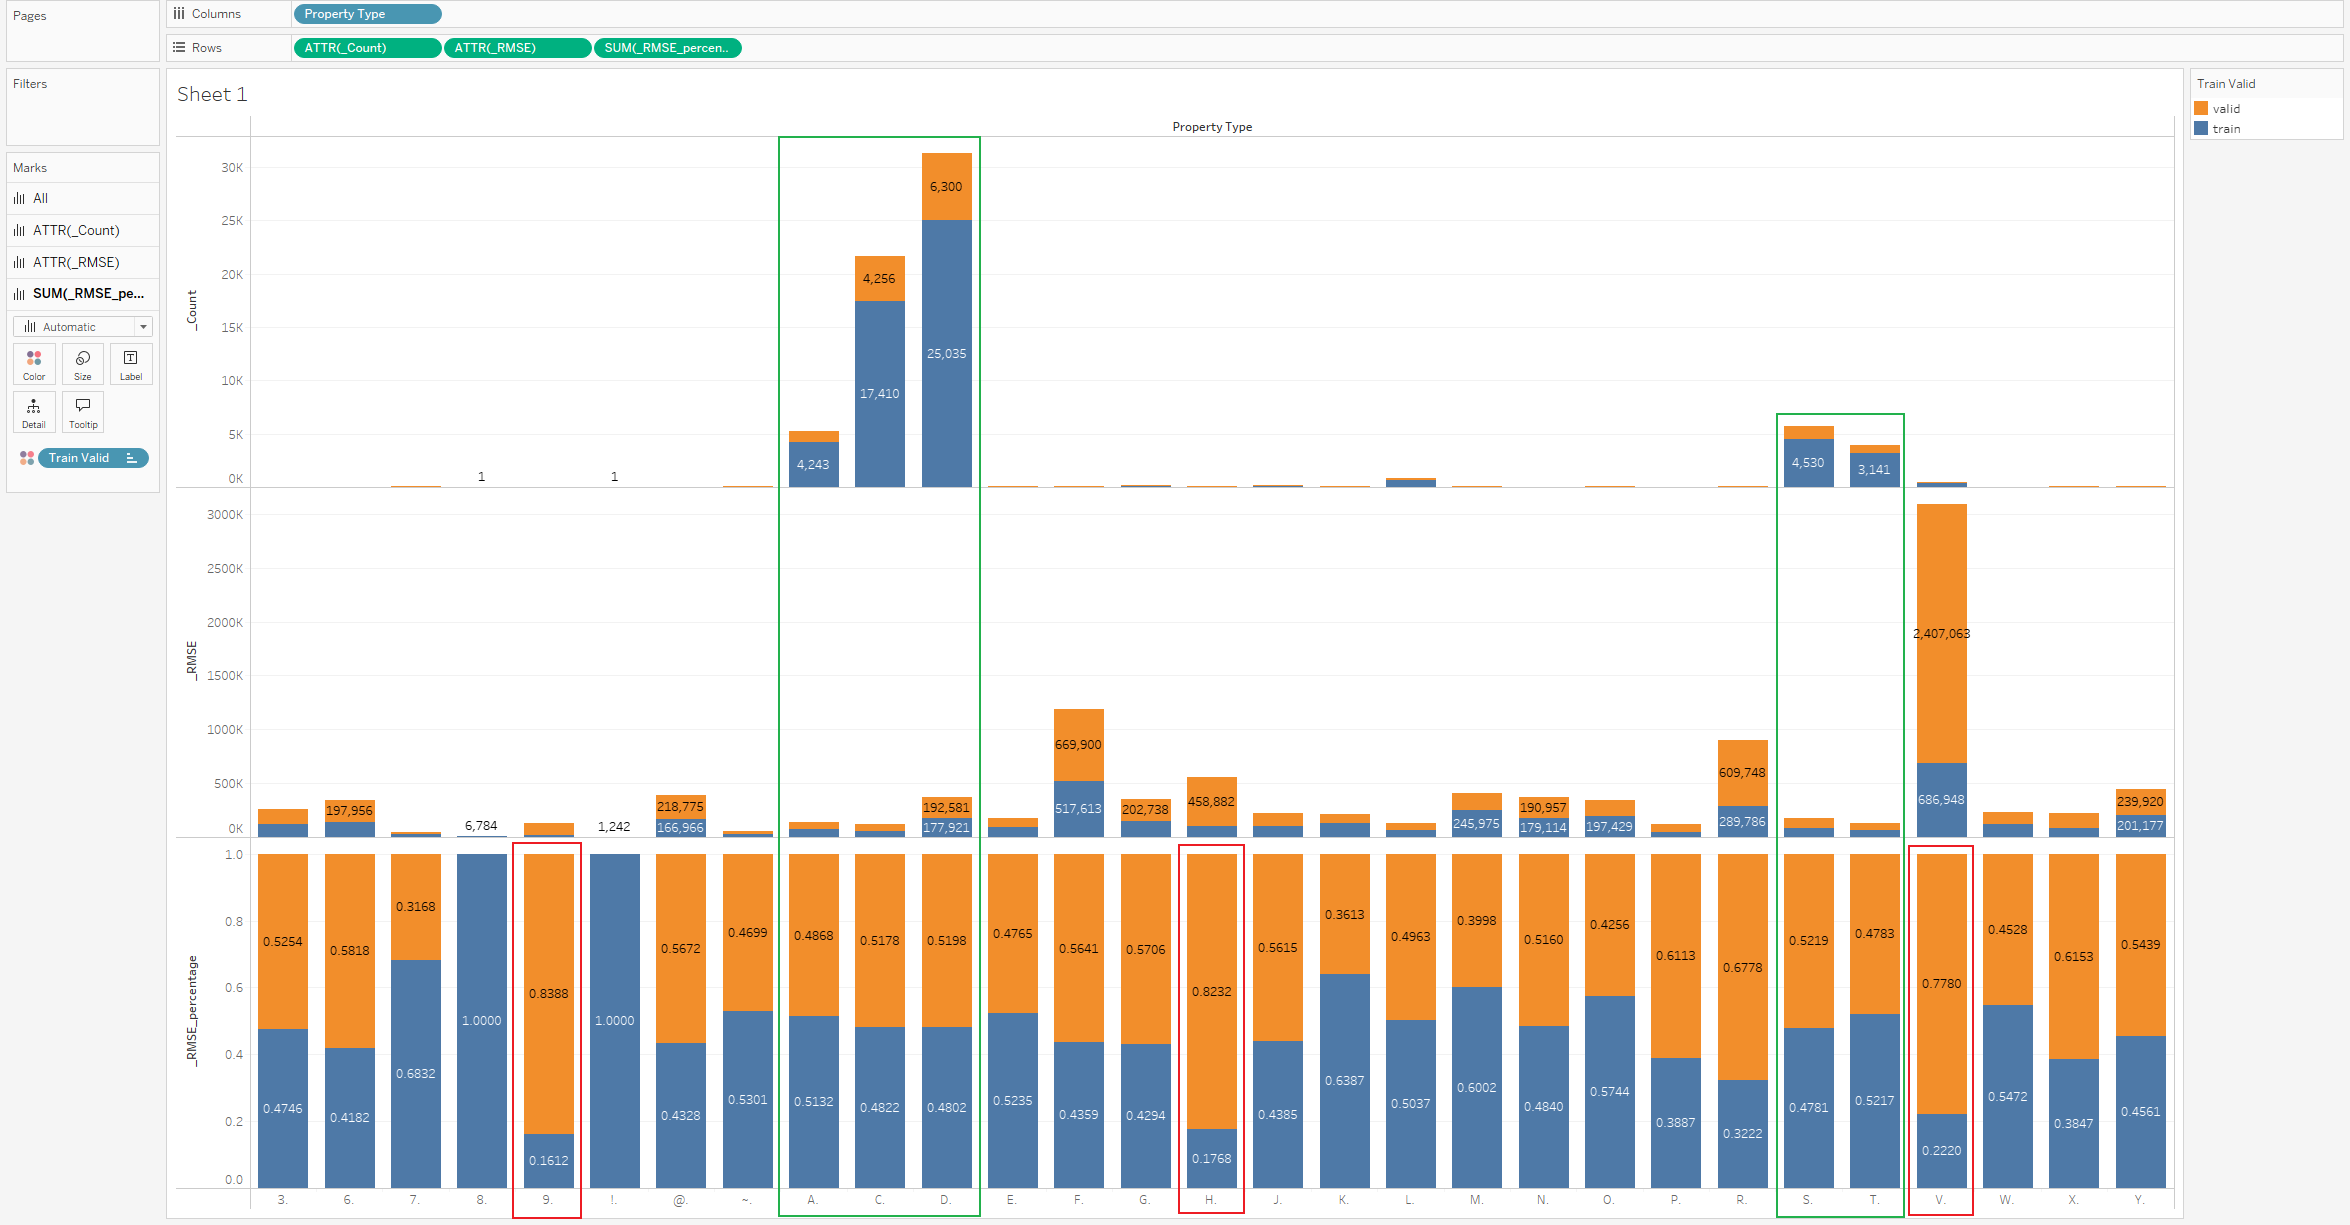</div>
- poor predictions on unseen data for property type 9,H,V
    - due to data imbalance and the data set is not large enough

<nop/> <div style="width: 1400px;">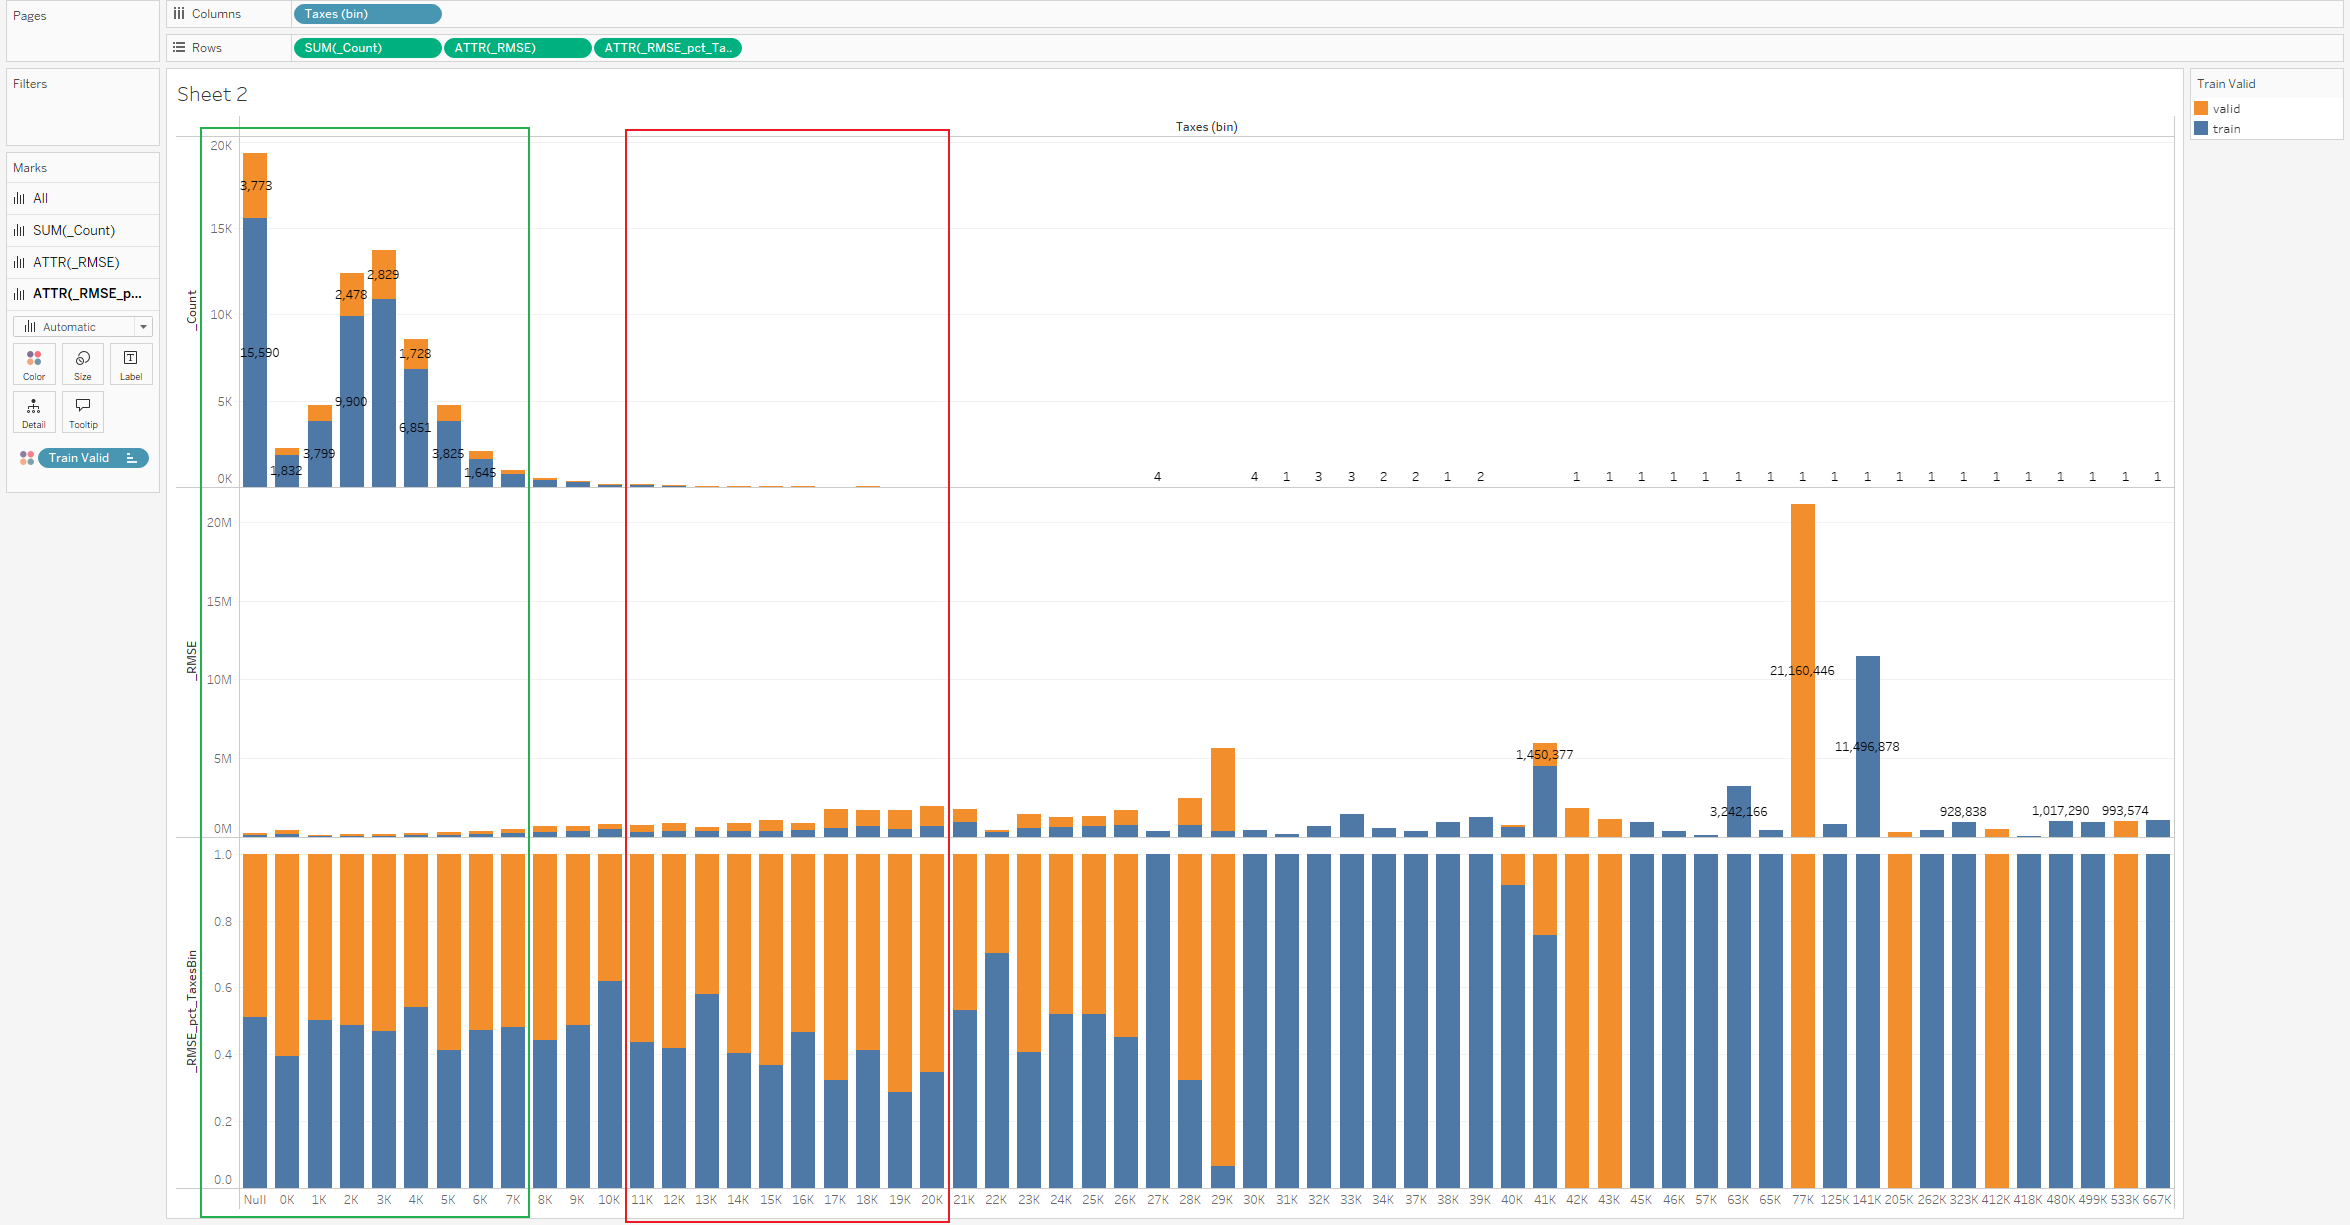</div>

- nice predictions on unseen data when the taxes are small
    - due to sufficient data for small taxes
- But the predictions deterioate when the taxes become larger
    - due to insufficient data for large taxes

# Improvement
Data:
- grow the dataset to have more data
- data augmentation to fix data imbalance
    - upsampling on the minority
    - downsampling on the majority

Model:
- Introduce L1,L2 regularization
    - as overfitting occur in the LightGBM's result (RMSE_train < RMSE_valid a lot)
    - will increase the RMSE_train while reduce the RMSE_valid
- hyperparameters tuning
    - the high complexity of the model would cause overfitting
    - reduce the max_depth and num_leaves to lower the model complexity
    - increase the min_data_in_leaf to prevent the model from learning overly specific patterns in the training data, which helps in reducing overfitting
    - lower the feature_fraction to introduce more randomness in the feature selection process, preventing the model from relying on the most important feature (taxes)
    - increase bagging_fraction and bagging_freq which is similar to lowering the feature_fraction, introducing more randomness to avoid overfitting

# Live Production Monitoring

## Real-time Dashboard
- Establish a real-time dashboard to continuously monitor the model's performance on new data by computing the RMSE on a rolling basis. This helps in detecting any drift in data distribution or model performance over time.
- Set up alerts for significant deviations in RMSE or other performance metrics, which could indicate issues such as data drift or model degradation.

## Retrain model
- Setup a model retrain pipeline when an alert was triggered by the live production monitoring.